# Predict if a person will have diabets

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Replace zeroes
zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for i in zero:
    df[i] = df[i].replace(0, np.NaN)
    mean = int(df[i].mean(skipna=True))
    df[i] = df[i].replace(np.NaN, mean)

In [7]:
# Split dataset
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# Normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# KNN

In [10]:
# Define the model - KNN
classifier = KNeighborsClassifier(n_neighbors = 11, p = 2, metric = 'euclidean')

In [11]:
# Predict the result
classifier.fit(X_train, y_train)
pred_knn = classifier.predict(X_test)
pred_knn

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [12]:
# Evaluate the model - Confusion Matrix
cm = confusion_matrix(y_test, pred_knn)
cm

array([[94, 13],
       [15, 32]], dtype=int64)

In [13]:
# f1 score
f1 = f1_score(y_test, pred_knn)
f1

0.6956521739130436

In [14]:
# Accuracy score
ac = accuracy_score(y_test, pred_knn)
ac

0.8181818181818182

# DecisionTreeClassifier

In [15]:
# Define the model - DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [16]:
# Predict the result
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
pred_dt

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [17]:
# Evaluate the model - Confusion Matrix
cm_dt = confusion_matrix(y_test, pred_dt)
cm_dt

array([[85, 22],
       [20, 27]], dtype=int64)

In [18]:
# f1 score
f1_dt = f1_score(y_test, pred_dt)
f1_dt

0.5625

In [19]:
# Accuracy score
ac_dt = accuracy_score(y_test, pred_dt)
ac_dt

0.7272727272727273

In [20]:
d = {'Model': ['KNN', 'DecisionTreeClassifier'],
     'accuracy' : [ac, ac_dt]}

result_df = pd.DataFrame(data=d)
result_df

,Model,accuracy
0,KNN,0.818182
1,DecisionTreeClassifier,0.727273


# Random Forest Classifier

In [26]:
rdm = RandomForestClassifier(n_estimators = 10)

In [29]:
rdm.fit(X_train, y_train)
pred_rdm = rdm.predict(X_test)
pred_rdm

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [30]:
# Evaluate the model - Confusion Matrix
cm_rdm = confusion_matrix(y_test, pred_rdm)
cm_rdm

array([[95, 12],
       [19, 28]], dtype=int64)

In [32]:
# f1 score
f1_rdm = f1_score(y_test, pred_rdm)
f1_rdm

0.6436781609195402

In [33]:
# Accuracy score
ac_rdm = accuracy_score(y_test, pred_rdm)
ac_rdm

0.7987012987012987

# Plot - Compare the Models

In [36]:
d = {'Model': ['KNN', 'DecisionTreeClassifier', 'RandomForestClassifier'],
     'accuracy' : [ac, ac_dt, ac_rdm]}

result_df = pd.DataFrame(data=d)
result_df

,Model,accuracy
0,KNN,0.818182
1,DecisionTreeClassifier,0.727273
2,RandomForestClassifier,0.798701


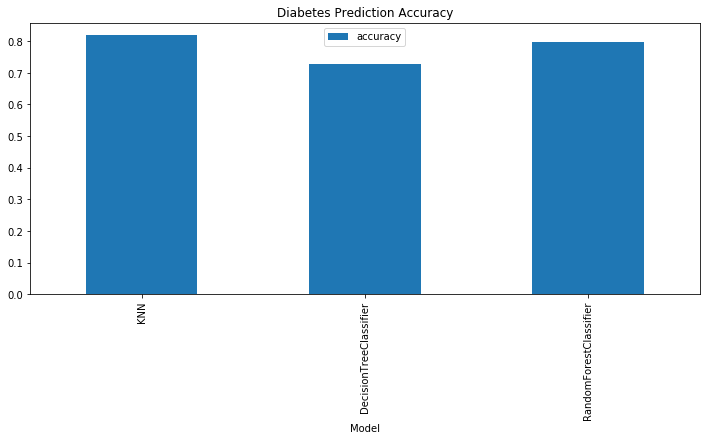

In [52]:
result_df.plot.bar(x='Model', y='accuracy', figsize=(12, 5), title='Diabetes Prediction Accuracy', 
               sort_columns=True)

# That's All Folks